[*********************100%***********************]  5 of 5 completed


최종 포트폴리오 가치 (월말 기준): 1.1482
누적 수익률: 14.82%


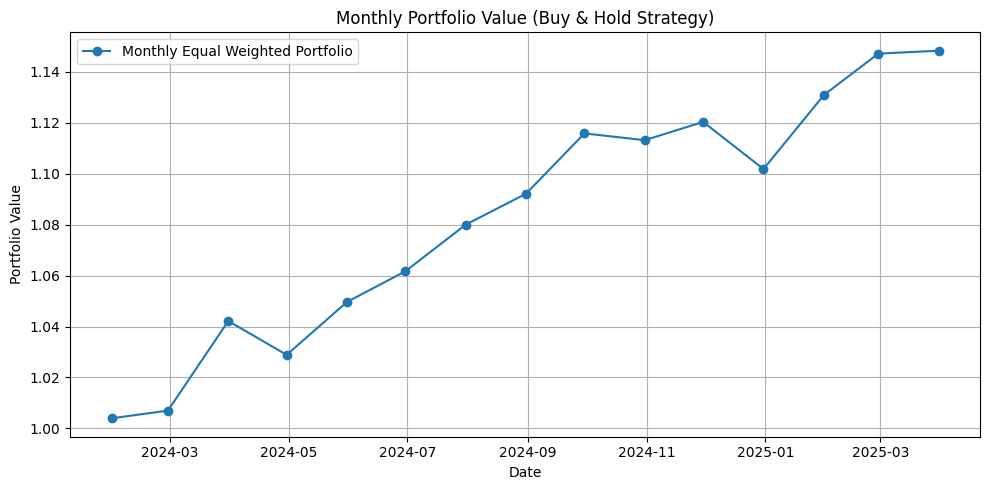

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

# (1) ETF 티커 목록
tickers = ["SPY", "TLT", "GLD", "DBC", "SHY"]

# (2) 데이터 수집
start_date = "2024-01-01"
end_date = "2025-03-30"

close_data = {}
for ticker in tickers:
    close_data[ticker] = yf.download(ticker, start=start_date, end=end_date)["Close"]
    time.sleep(2)
df = pd.DataFrame(close_data)

# (3) 결측치 제거
data = df.dropna()

# (4) 일간 수익률 계산
daily_returns = data.pct_change().dropna()

# (5) 균등 비중 설정
weights = np.array([1 / len(tickers)] * len(tickers))

# (6) 매일 포트폴리오 수익률 계산
daily_portfolio_returns = daily_returns.dot(weights)

# (7) 월별 수익률 계산 (복리 기준)
monthly_returns = (1 + daily_portfolio_returns).resample("M").prod() - 1

# (8) 월별 누적 수익률 계산
monthly_cumulative_value = (1 + monthly_returns).cumprod()

# (9) 출력
final_value = monthly_cumulative_value.iloc[-1]
cumulative_return = (final_value - 1) * 100
print(f"최종 포트폴리오 가치 (월말 기준): {final_value:.4f}")
print(f"누적 수익률: {cumulative_return:.2f}%")

# (10) 그래프 시각화
plt.figure(figsize=(10, 5))
plt.plot(monthly_cumulative_value, marker='o', label="Monthly Equal Weighted Portfolio")
plt.title("Monthly Portfolio Value (Buy & Hold Strategy)")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
